In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [94]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
df.shape

(768, 9)

In [96]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [98]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [99]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [100]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

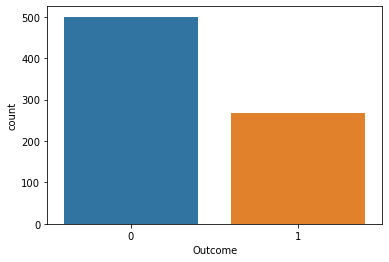

In [101]:
sns.countplot(x='Outcome',data=df)

In [102]:
for i in df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]:
    print(len(df.loc[(df[i]==0),i]))

5
35
227
374
11


In [103]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [104]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [105]:
for i in df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]:
    df[i].fillna(df[i].mean(), inplace=True)

In [106]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [107]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


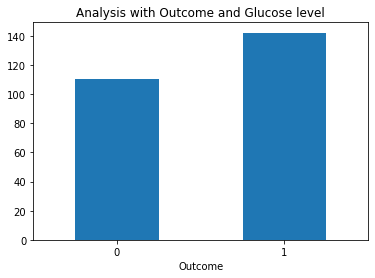

In [108]:
df.groupby('Outcome')['Glucose'].mean().plot(kind='bar',rot=0)
plt.title('Analysis with Outcome and Glucose level')
plt.show()

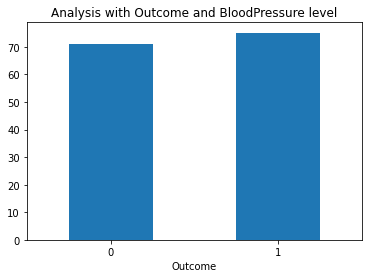

In [109]:
df.groupby('Outcome')['BloodPressure'].mean().plot(kind='bar',rot=0)
plt.title('Analysis with Outcome and BloodPressure level')
plt.show()

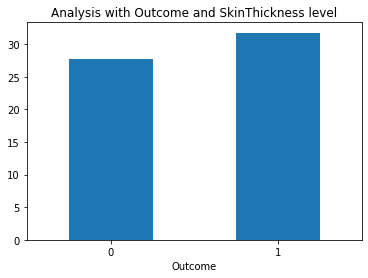

In [110]:
df.groupby('Outcome')['SkinThickness'].mean().plot(kind='bar',rot=0)
plt.title('Analysis with Outcome and SkinThickness level')
plt.show()

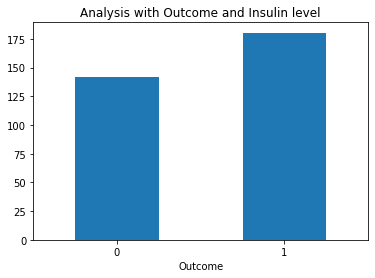

In [111]:
df.groupby('Outcome')['Insulin'].mean().plot(kind='bar',rot=0)
plt.title('Analysis with Outcome and Insulin level')
plt.show()

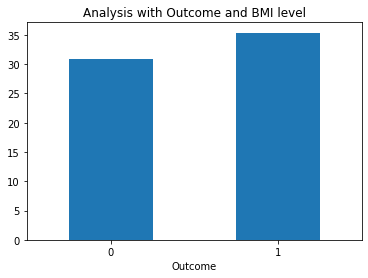

In [112]:
df.groupby('Outcome')['BMI'].mean().plot(kind='bar',rot=0)
plt.title('Analysis with Outcome and BMI level')
plt.show()

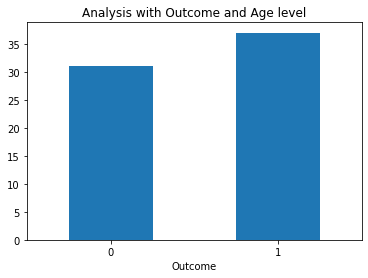

In [113]:
df.groupby('Outcome')['Age'].mean().plot(kind='bar',rot=0)
plt.title('Analysis with Outcome and Age level')
plt.show()

In [114]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


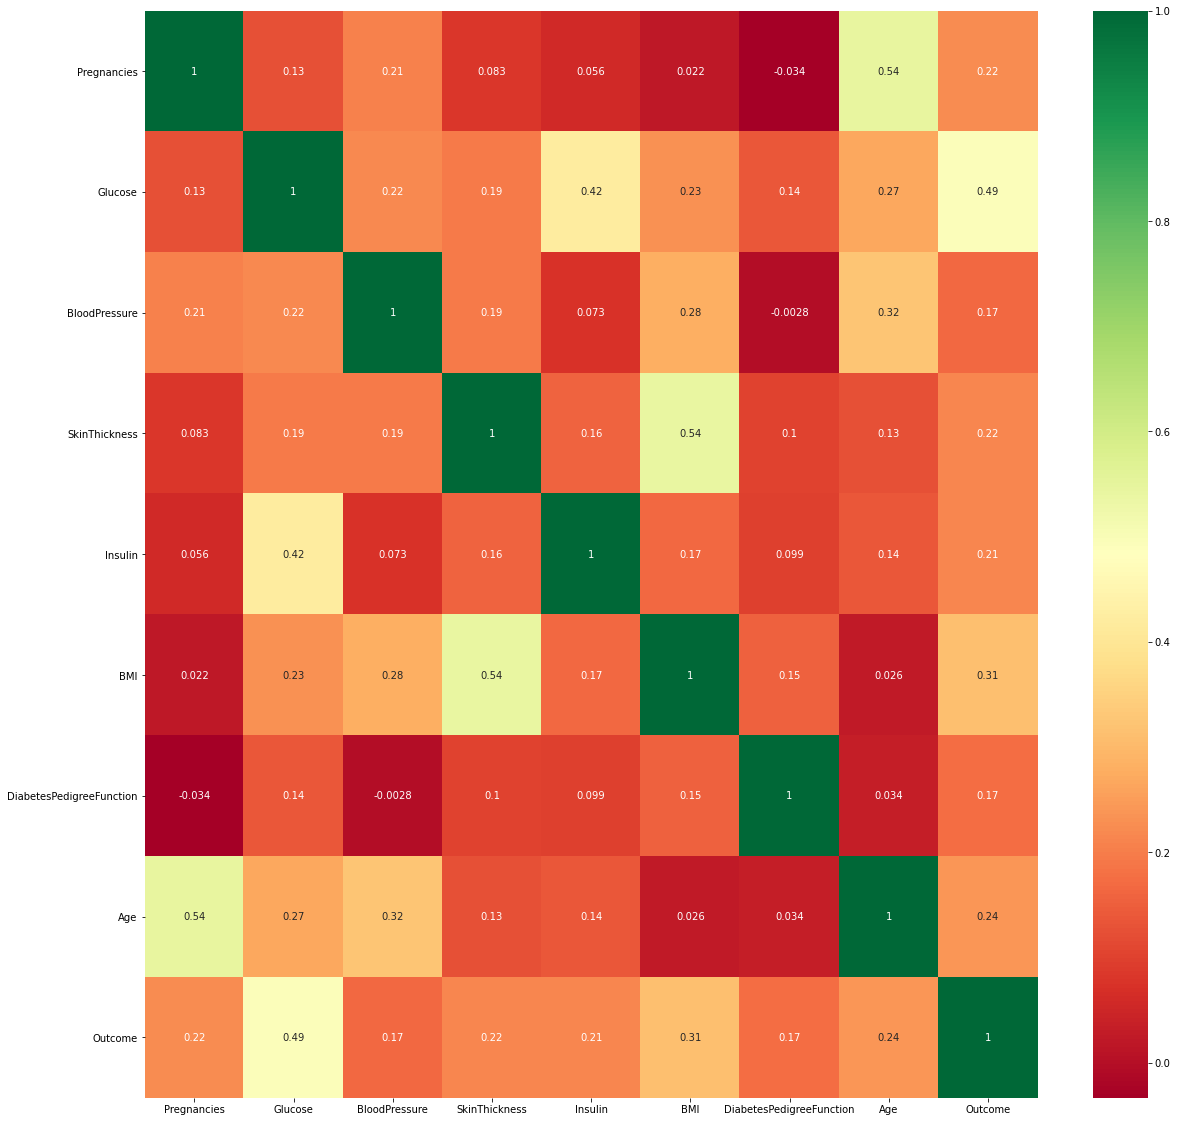

In [115]:
corrmat = df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

g = sns.heatmap(df[top_corr_features].corr() , annot=True ,cmap='RdYlGn')

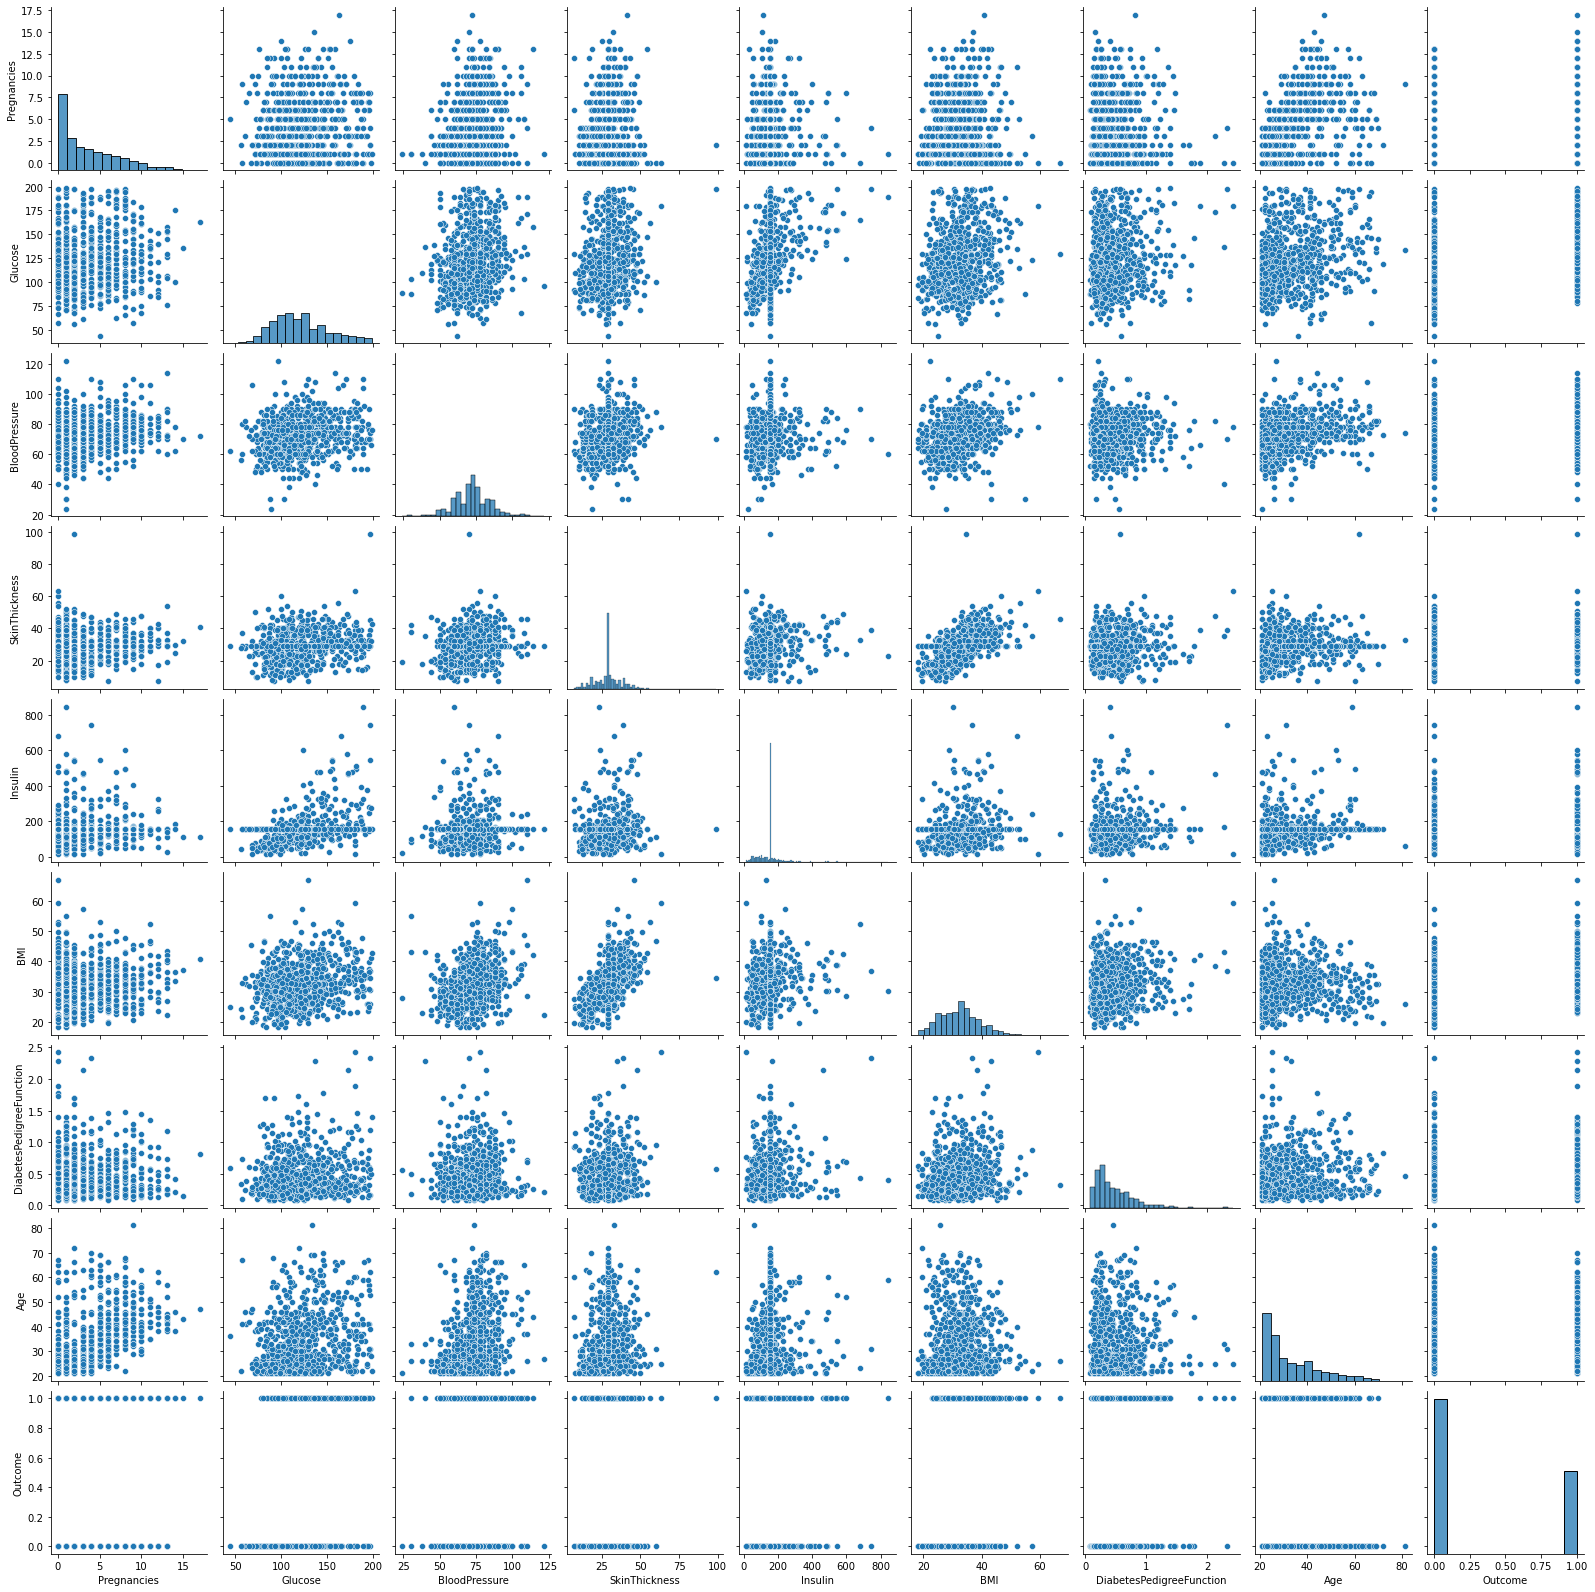

In [116]:
sns.pairplot(df)

In [117]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [118]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [119]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 101)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [131]:
log = LogisticRegression()
dtc = DecisionTreeClassifier(max_depth=3,random_state=42)
random = RandomForestClassifier(max_depth=3, random_state=42)
gnb = GaussianNB()
knc = KNeighborsClassifier(n_neighbors=5)
svc = SVC()

In [134]:
log.fit(x,y)
dtc.fit(x,y)
random.fit(x,y)
gnb.fit(x,y)
knc.fit(x,y)
svc.fit(x,y)

C:\Users\JAYSRI\Downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [135]:
log_pred = log.predict(x_test)
dtc_pred = dtc.predict(x_test)
random_pred = random.predict(x_test)
gnb_pred = gnb.predict(x_test)
knc_pred = knc.predict(x_test)
svc_pred = svc.predict(x_test)

In [136]:
log_acc = accuracy_score(y_test, log_pred)
dtc_acc = accuracy_score(y_test,dtc_pred)
random_acc = accuracy_score(y_test, random_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
knc_acc = accuracy_score(y_test, knc_pred)
svc_acc = accuracy_score(y_test, svc_pred)

In [143]:
print('Logistic Regression:' ,log_acc)
print('Decision Tree Classifier:', dtc_acc)
print('Random Forest classsifier:', random_acc)
print('Gaussian NB:',gnb_acc)
print('K Neighbors Classifier',knc_acc)
print('SVC:',svc_acc)

Logistic Regression: 0.7792207792207793
Decision Tree Classifier: 0.7922077922077922
Random Forest classsifier: 0.7965367965367965
Gaussian NB: 0.7489177489177489
K Neighbors Classifier 0.8311688311688312
SVC: 0.7835497835497836


In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knc_pred)
cm

array([[136,  14],
       [ 25,  56]], dtype=int64)

<AxesSubplot:>

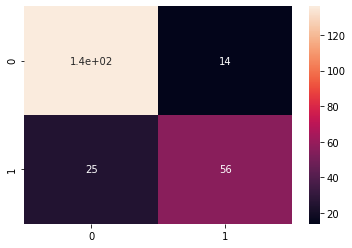

In [145]:
sns.heatmap(pd.DataFrame(cm), annot=True)

C:\Users\JAYSRI\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Density'>

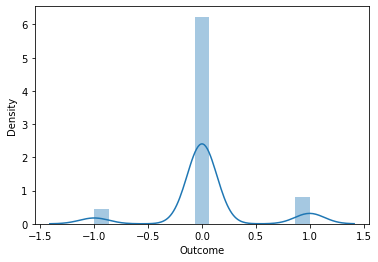

In [146]:
sns.distplot(y_test-knc_pred)

In [147]:
import pickle
file = open('diabetes.pkl','wb')
pickle.dump(knc,file)